In [110]:
import math
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from scipy.fft import fft, fftfreq, fftshift

from IPython.display import Audio
from IPython.core.display import display
import time


In [76]:
# OCT 2 FREQUENCY DICTIONARY
# https://mixbutton.com/mixing-articles/music-note-to-frequency-chart/
freq_dictionary = {
    "C" : 65.41,
    "C_Sharp" : 69.30,
    "D" : 73.42,
    "D_Sharp" : 77.78,
    "E" : 82.41,
    "F" : 87.31,
    "F_Sharp" : 92.5,
    "G" : 98.00,
    "G_Sharp" : 103.83,
    "A" : 110.0,
    "A_Sharp" : 116.54,
    "B" : 123.47
}

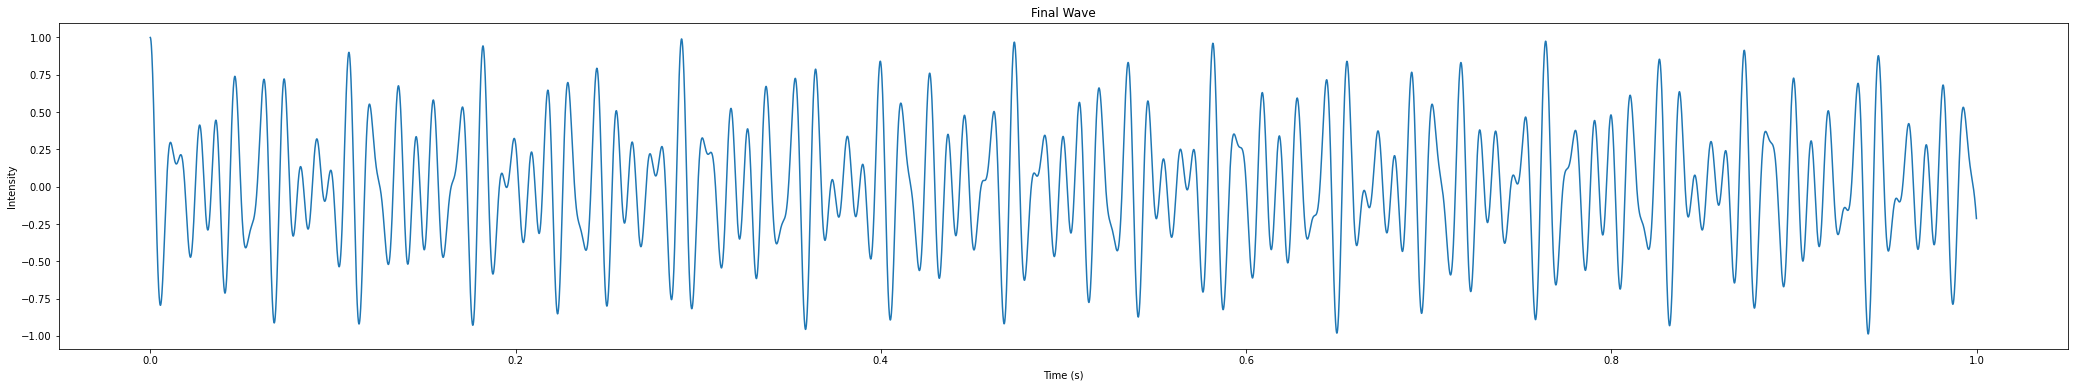

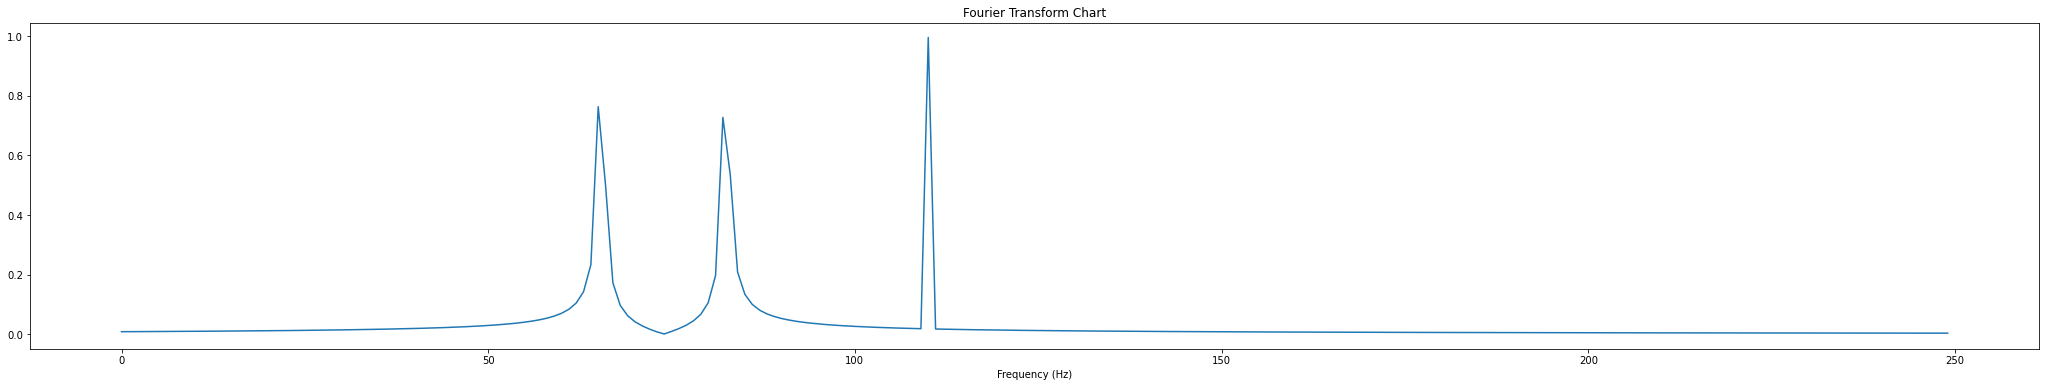

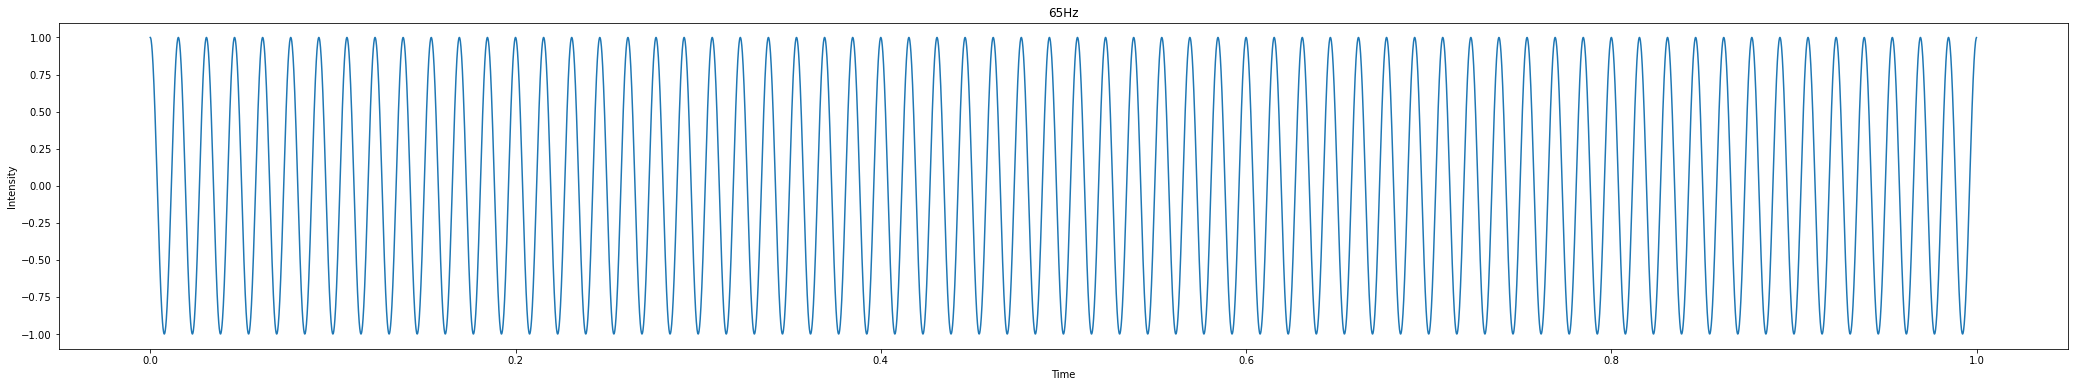

There is a wave at 65Hz


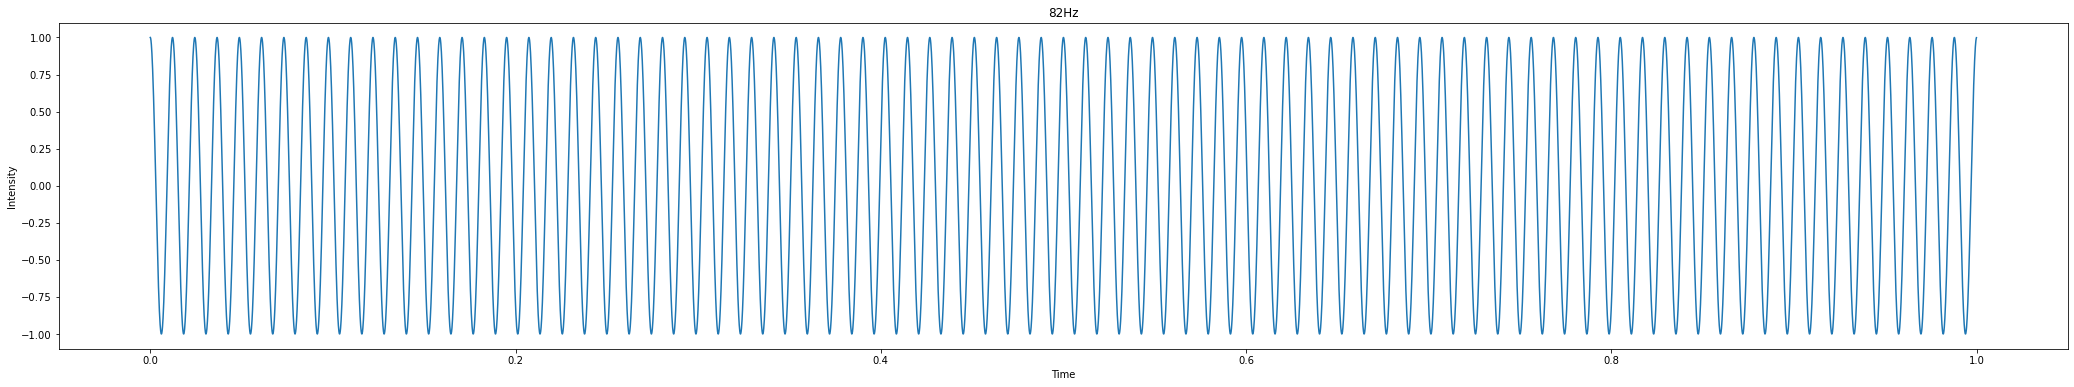

There is a wave at 82Hz


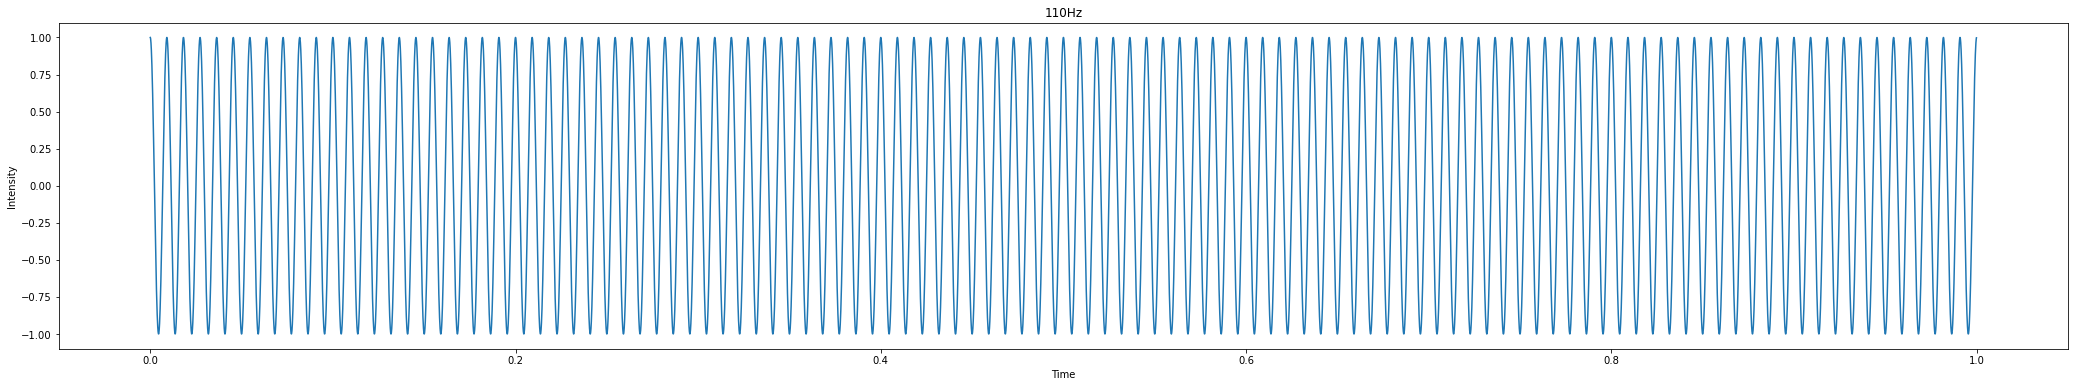

There is a wave at 110Hz


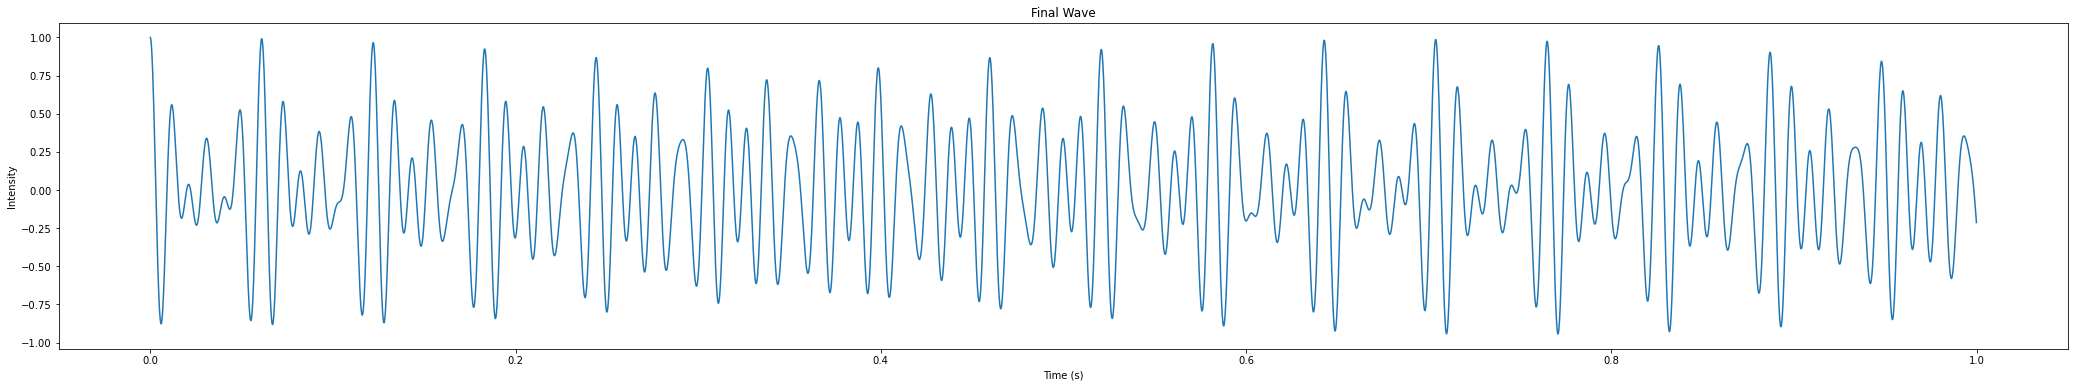

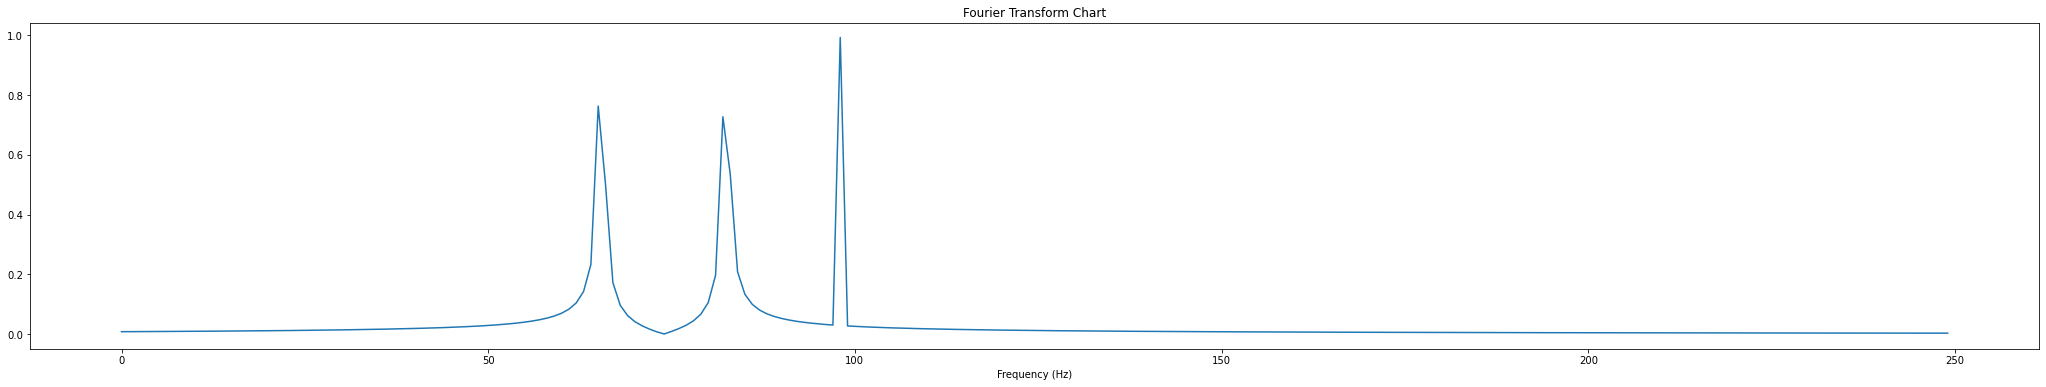

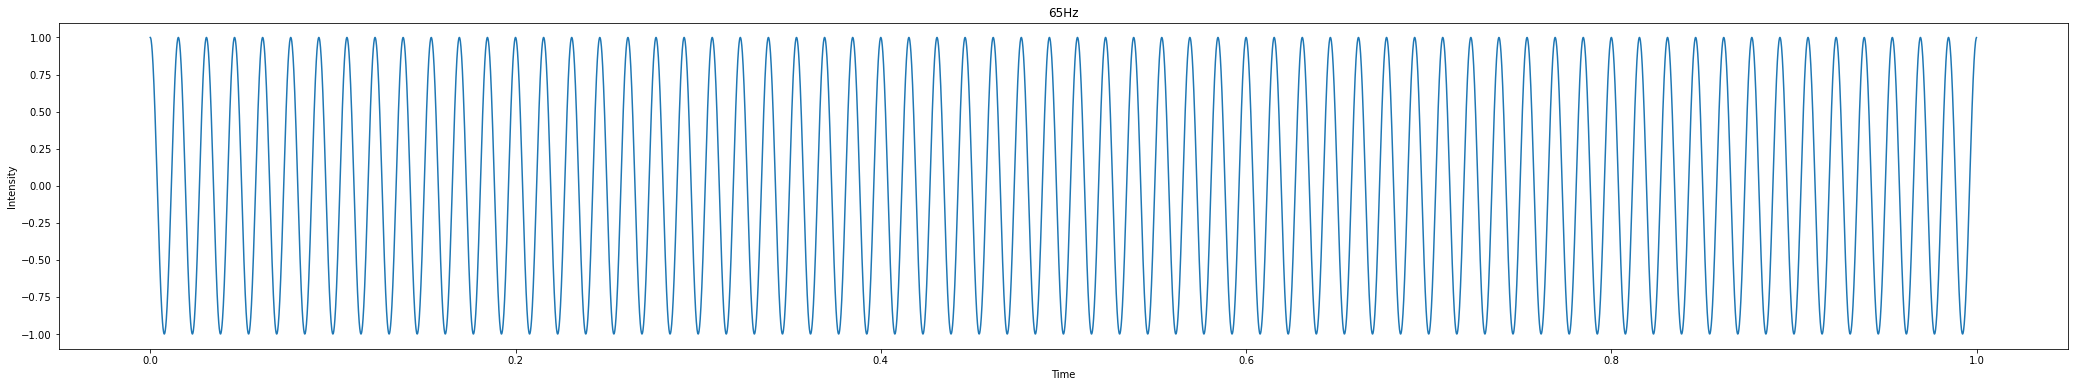

There is a wave at 65Hz


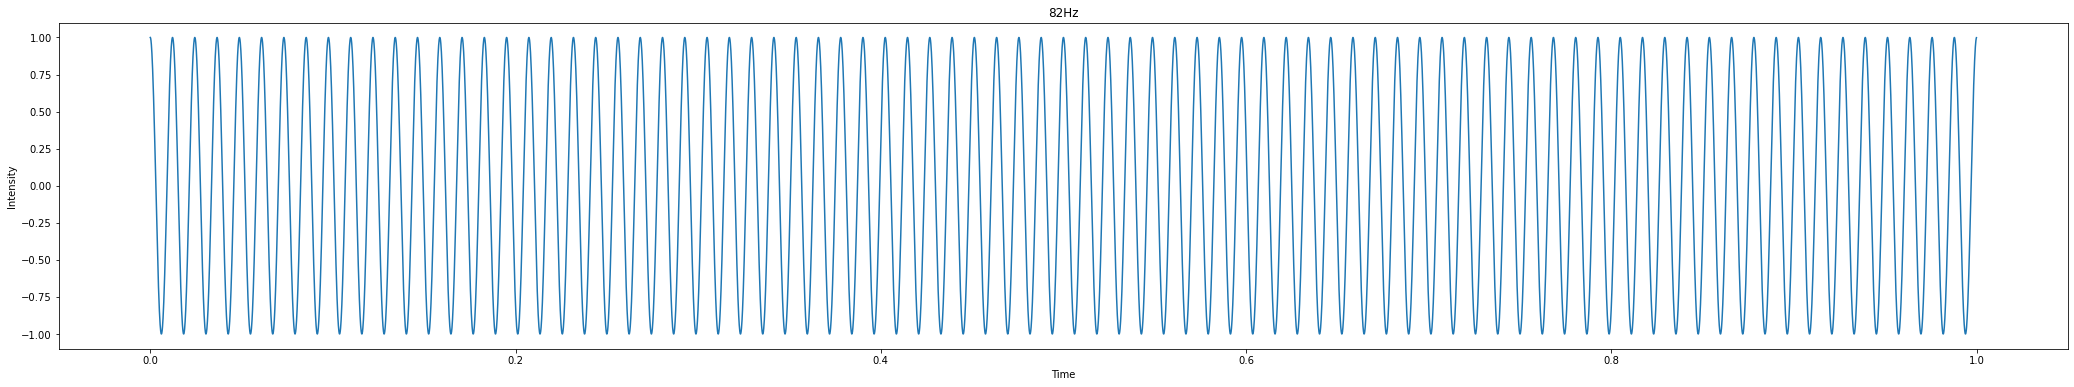

There is a wave at 82Hz


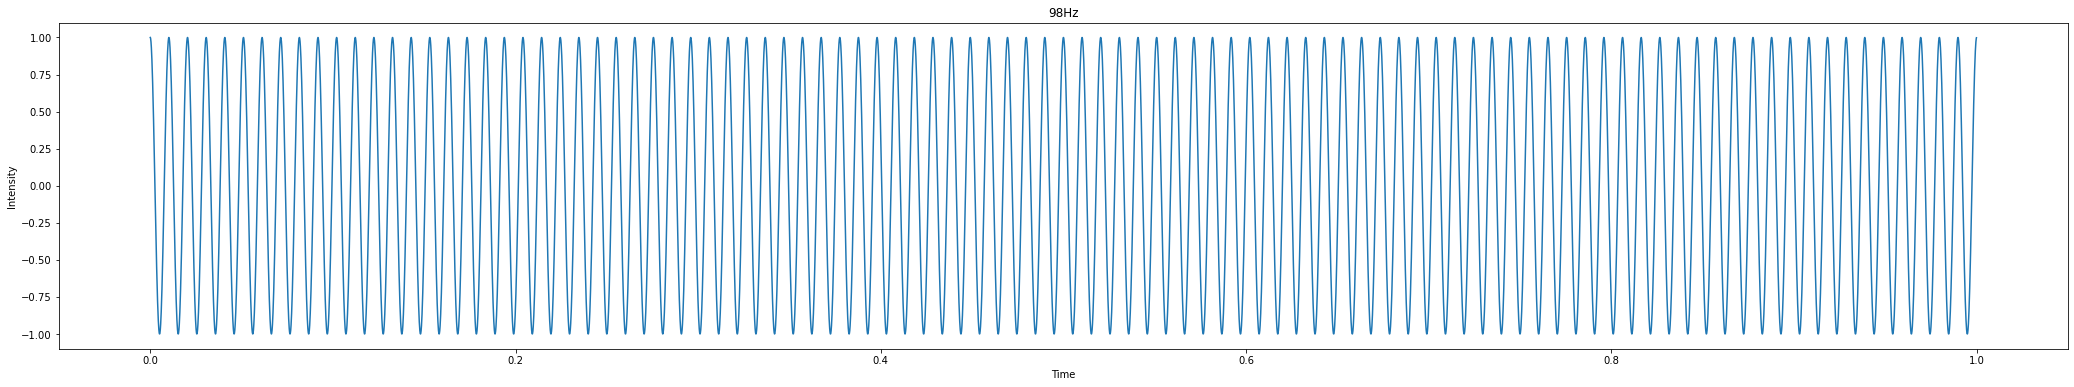

There is a wave at 98Hz


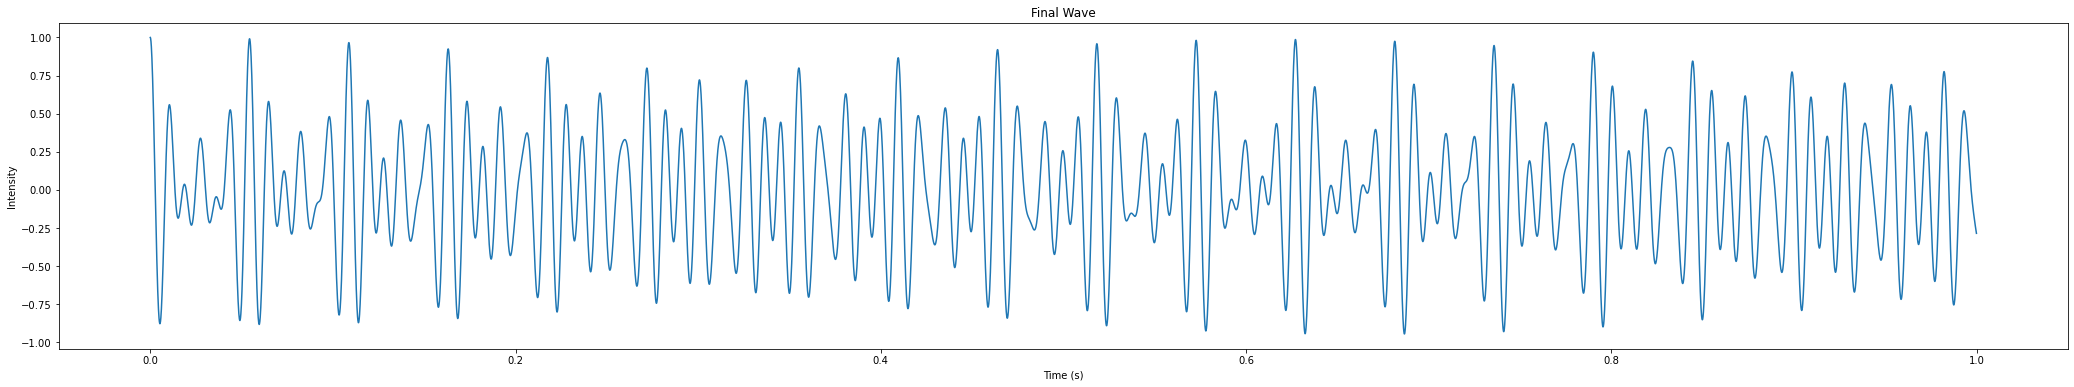

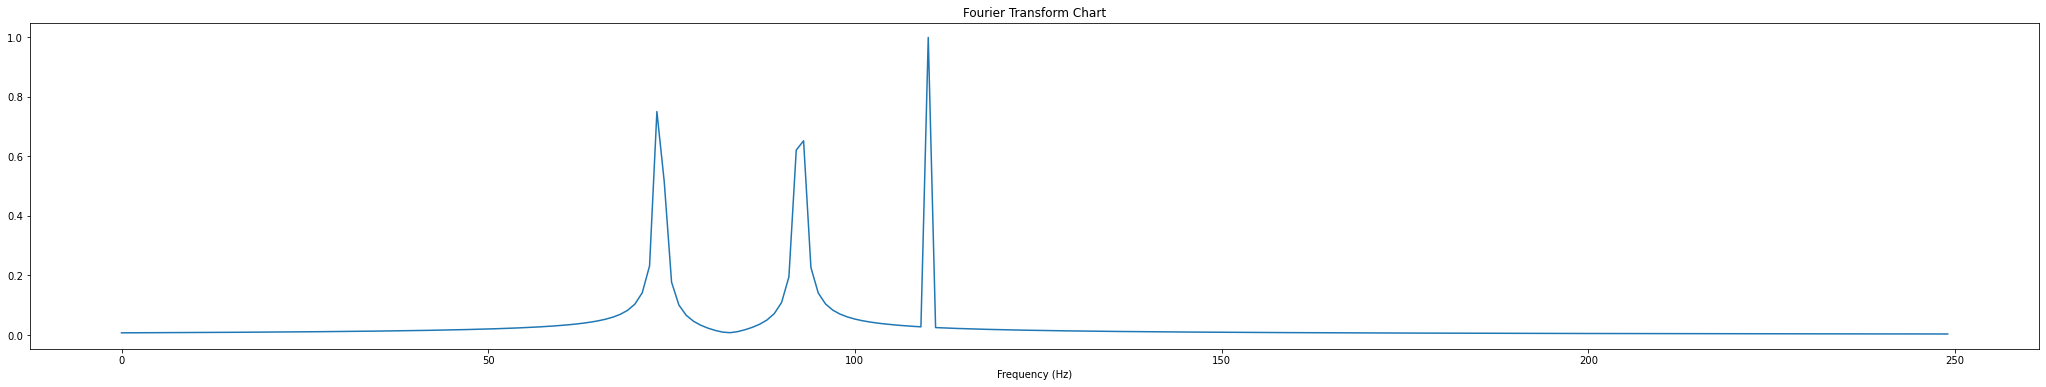

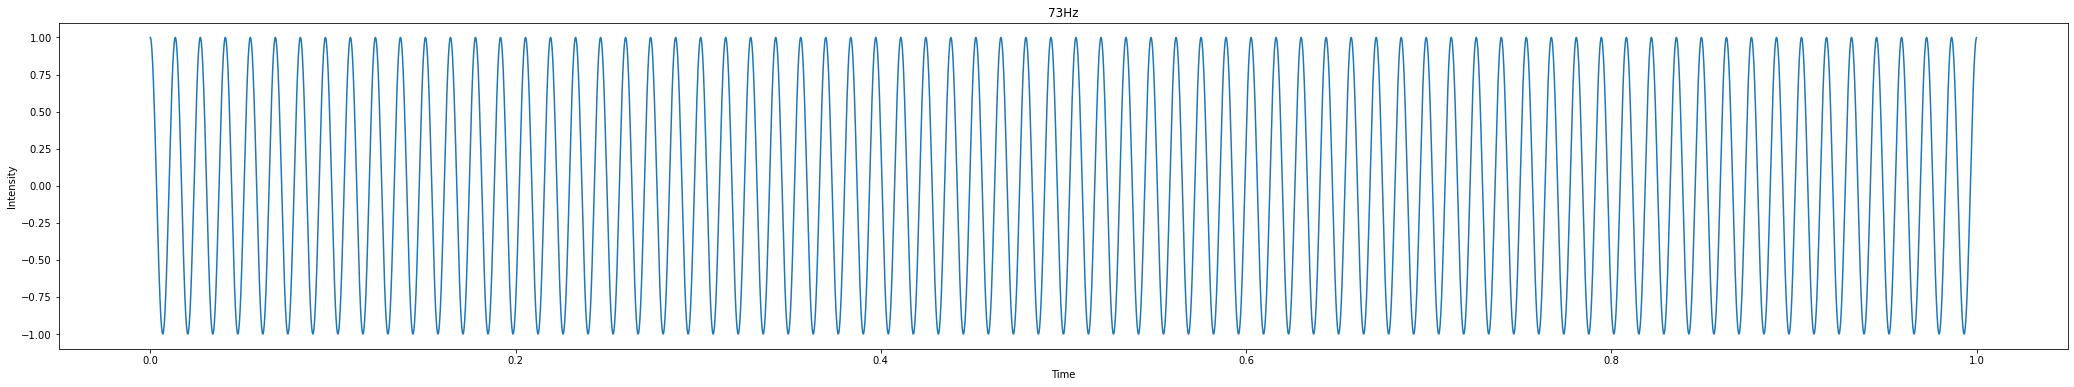

There is a wave at 73Hz


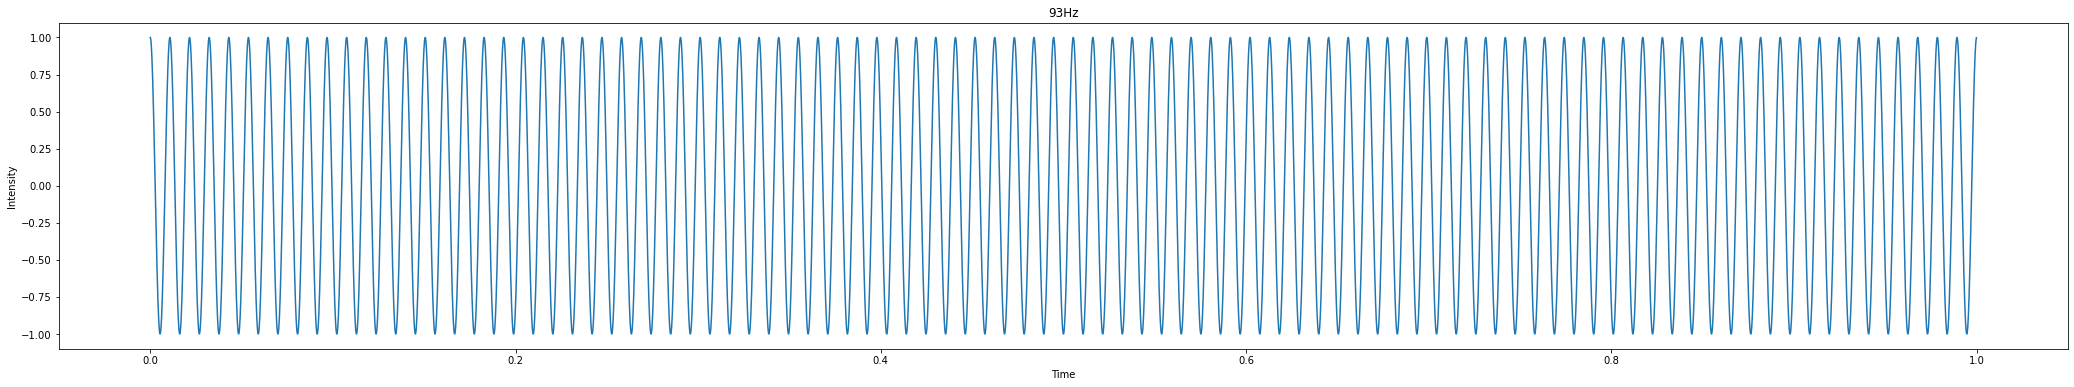

There is a wave at 93Hz


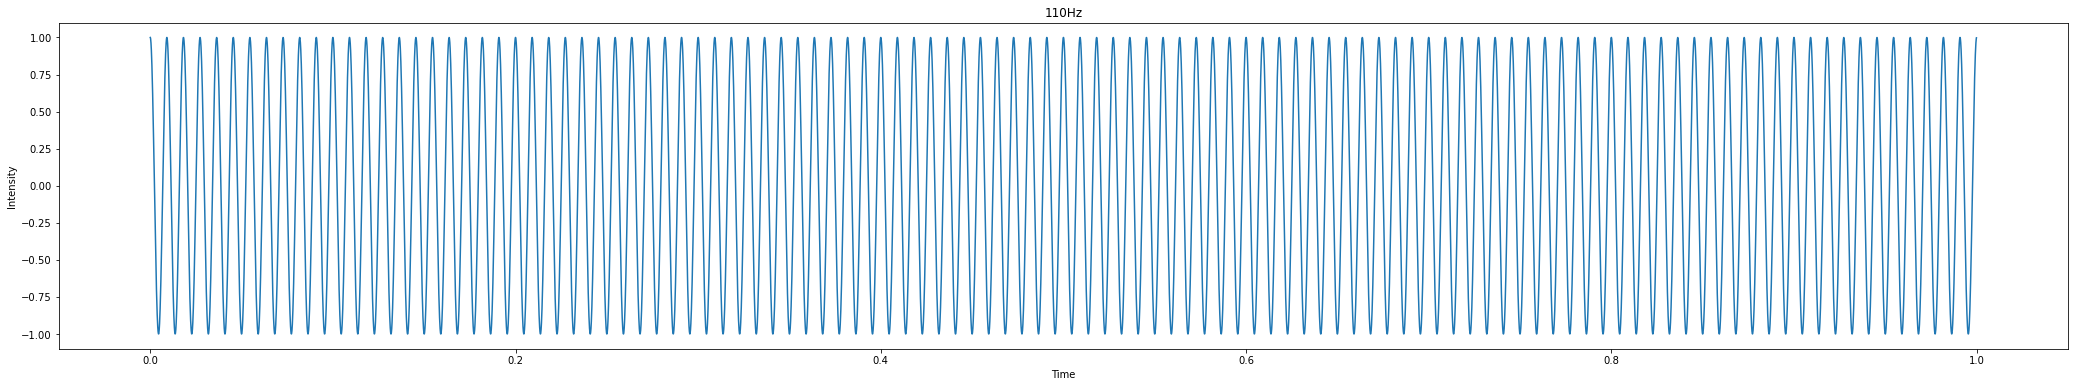

There is a wave at 110Hz


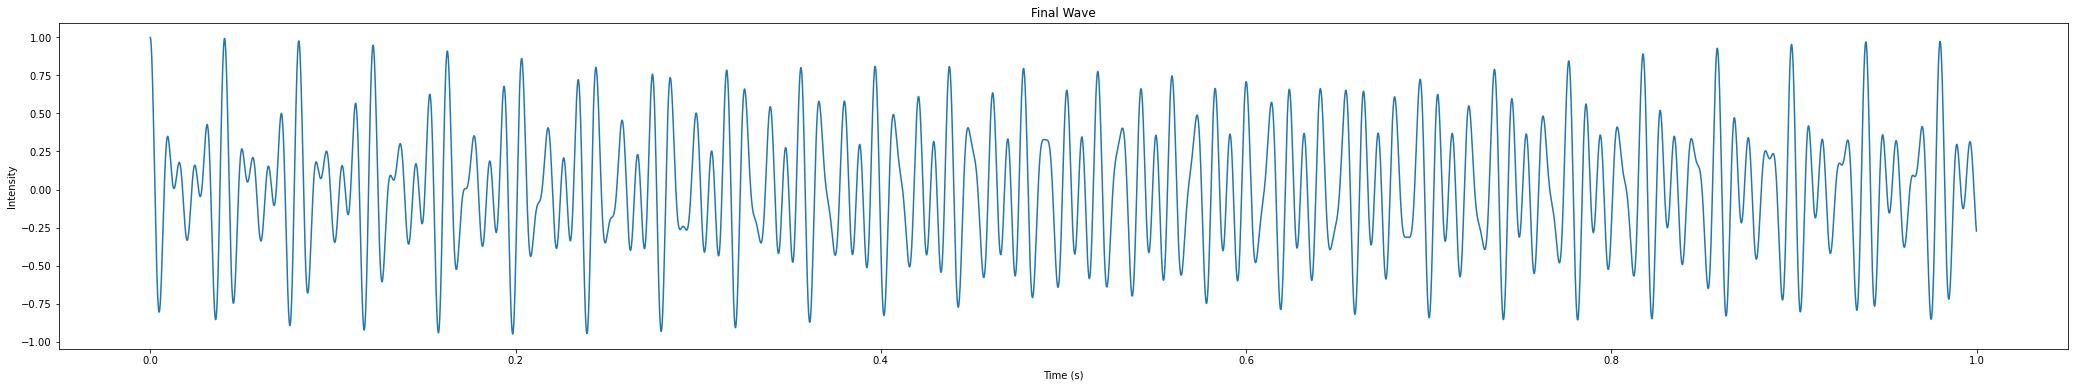

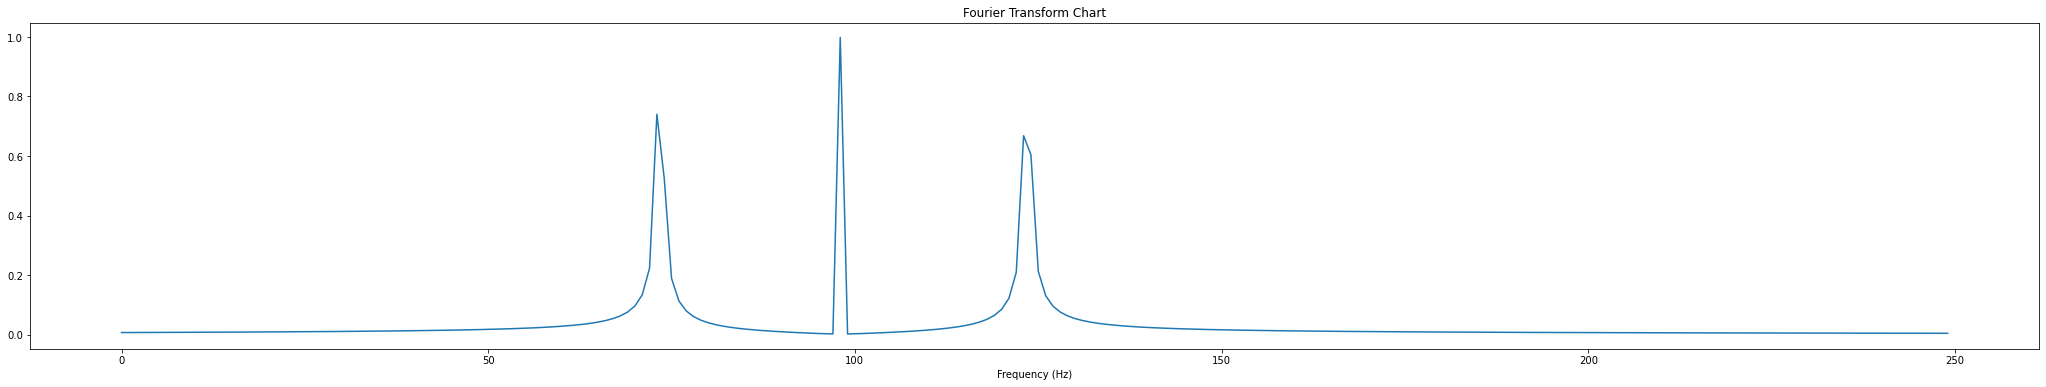

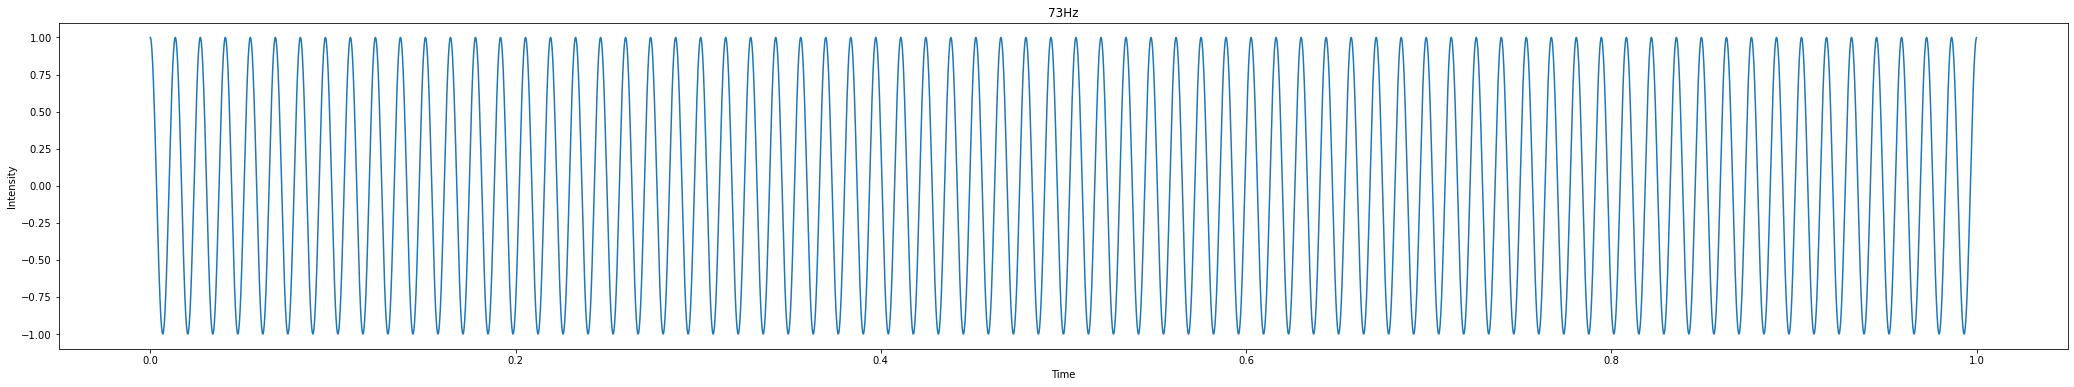

There is a wave at 73Hz


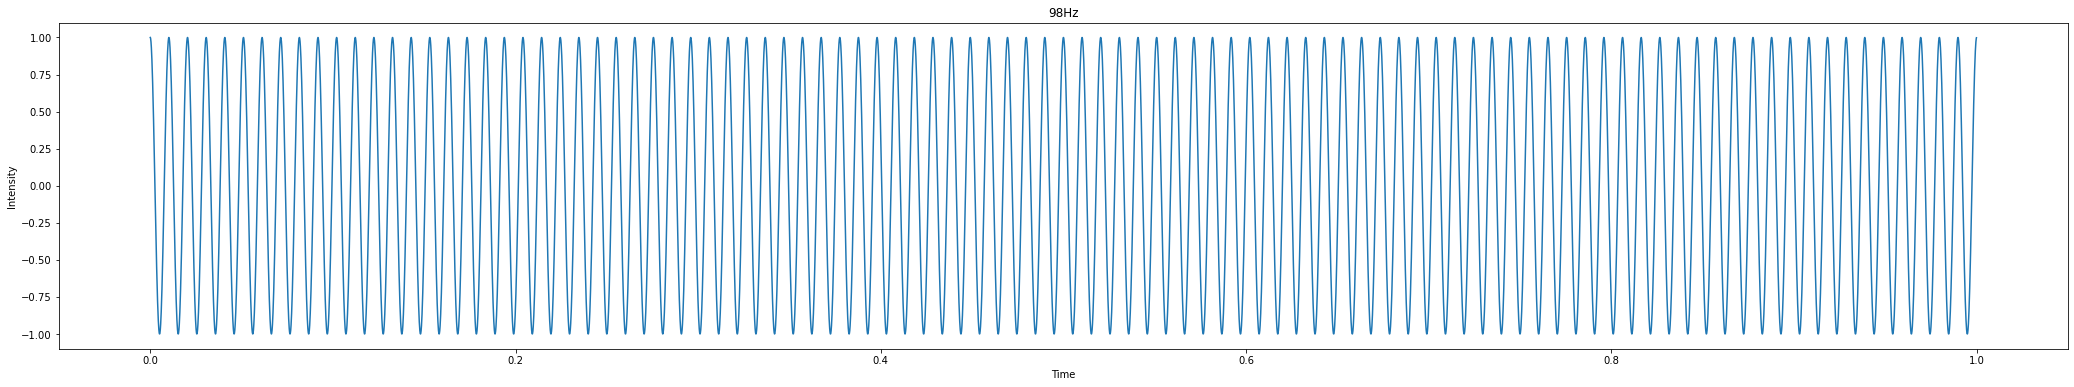

There is a wave at 98Hz


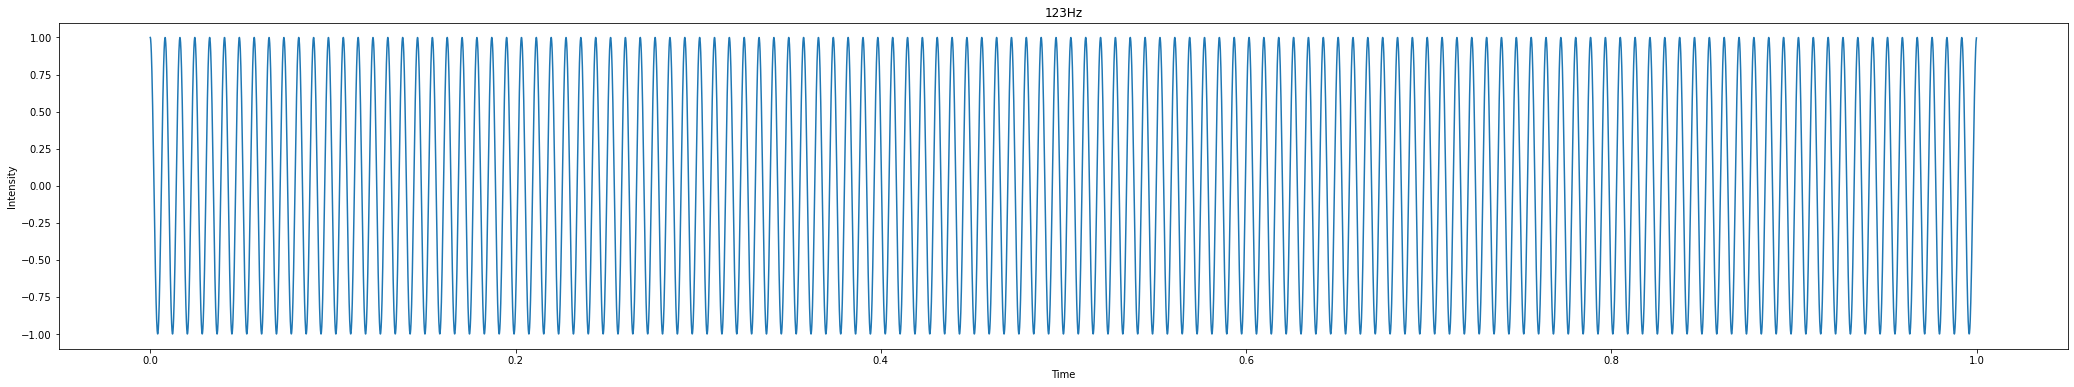

There is a wave at 123Hz


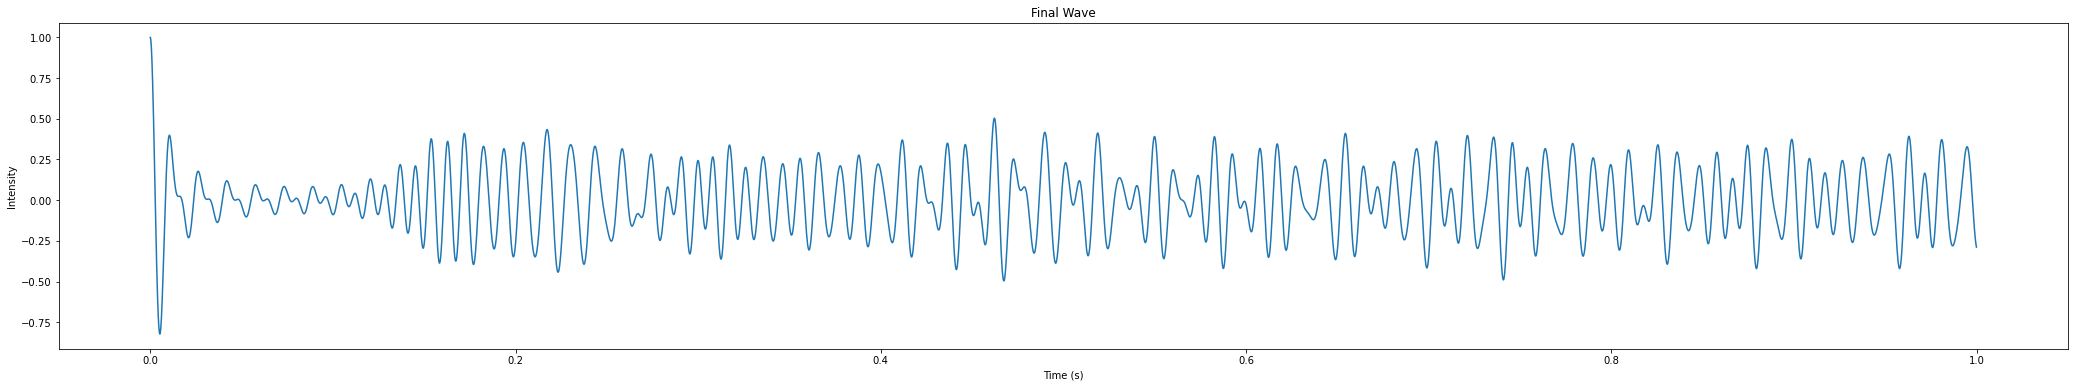

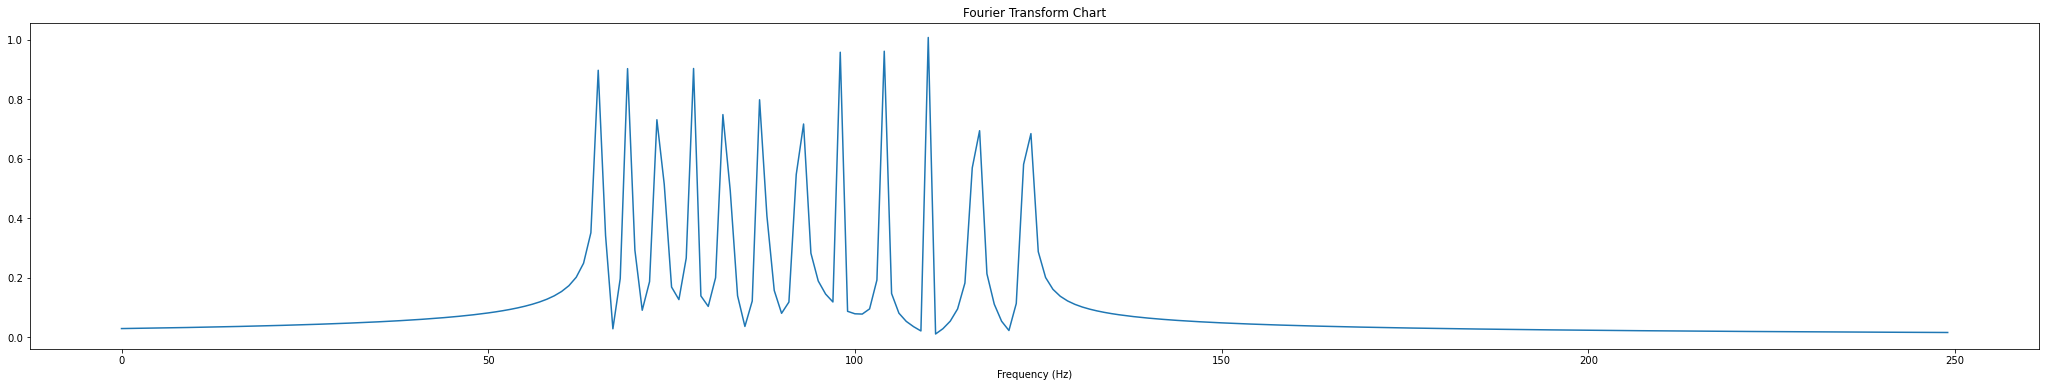

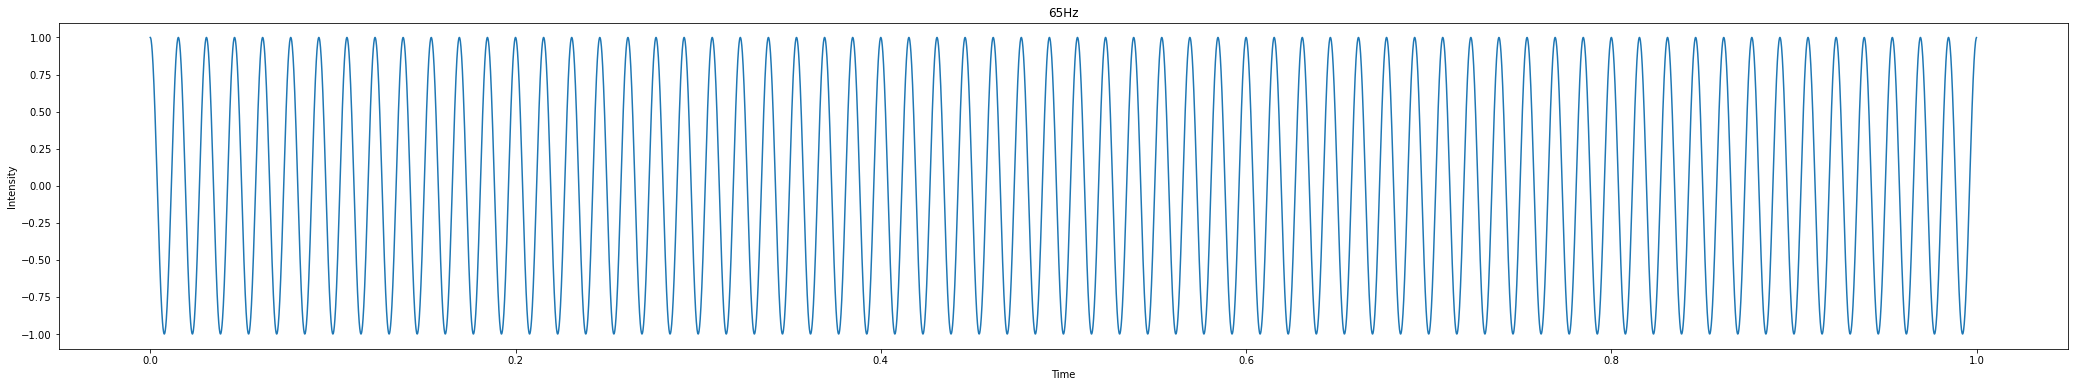

There is a wave at 65Hz


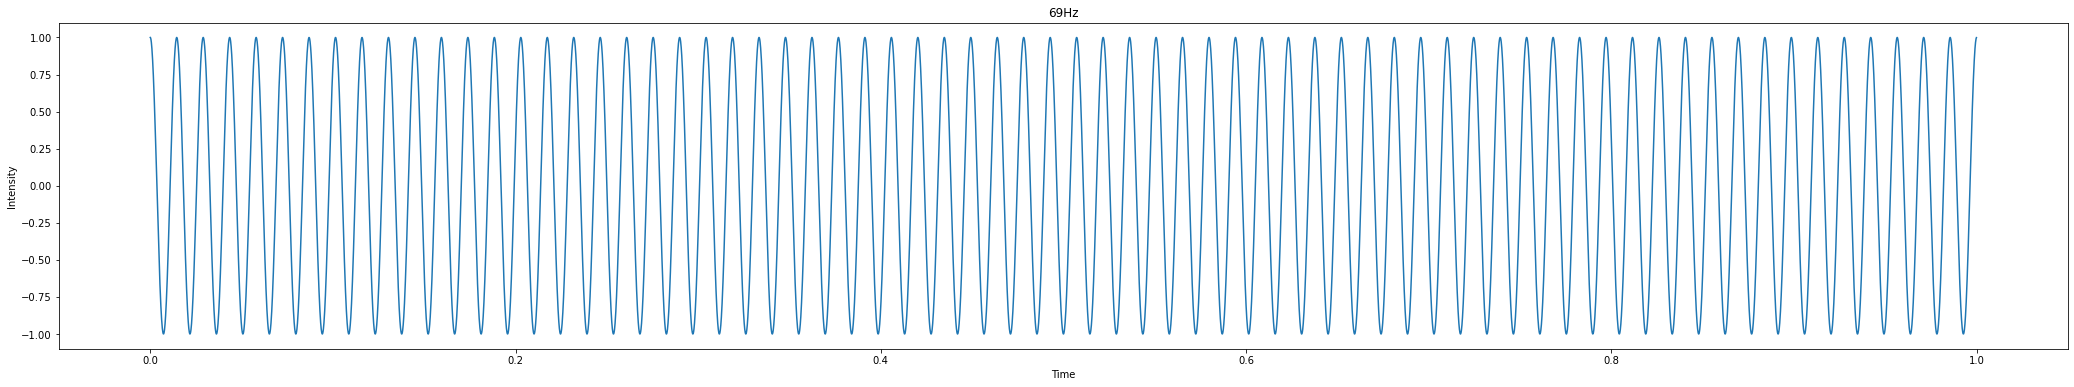

There is a wave at 69Hz


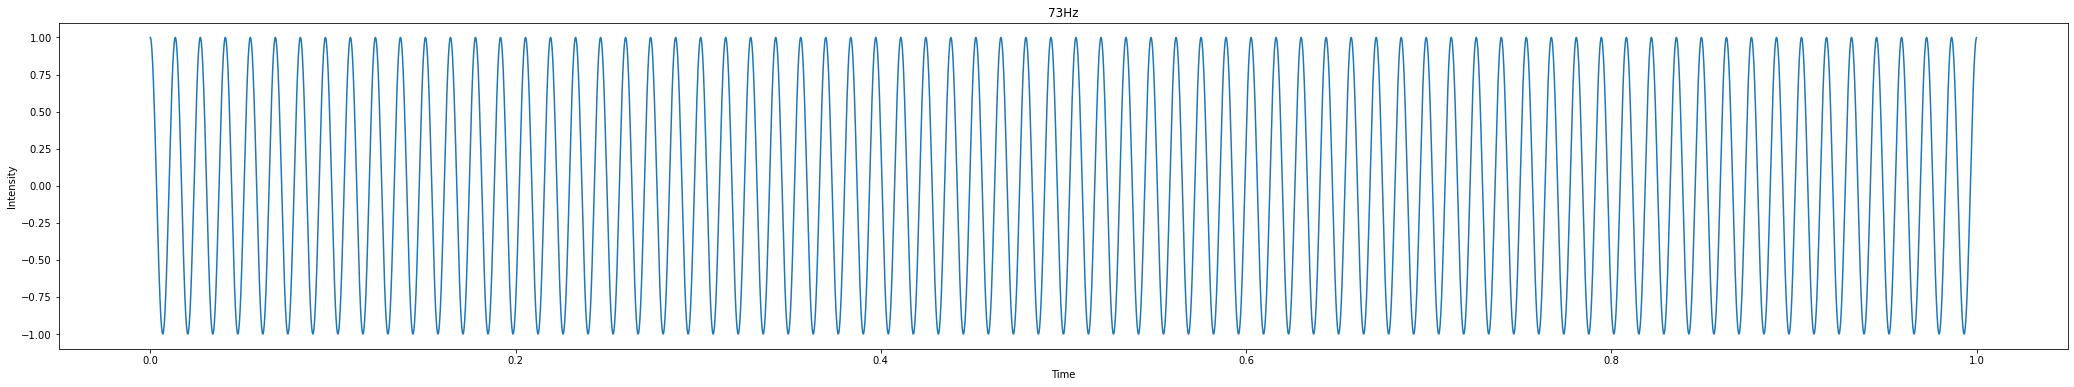

There is a wave at 73Hz


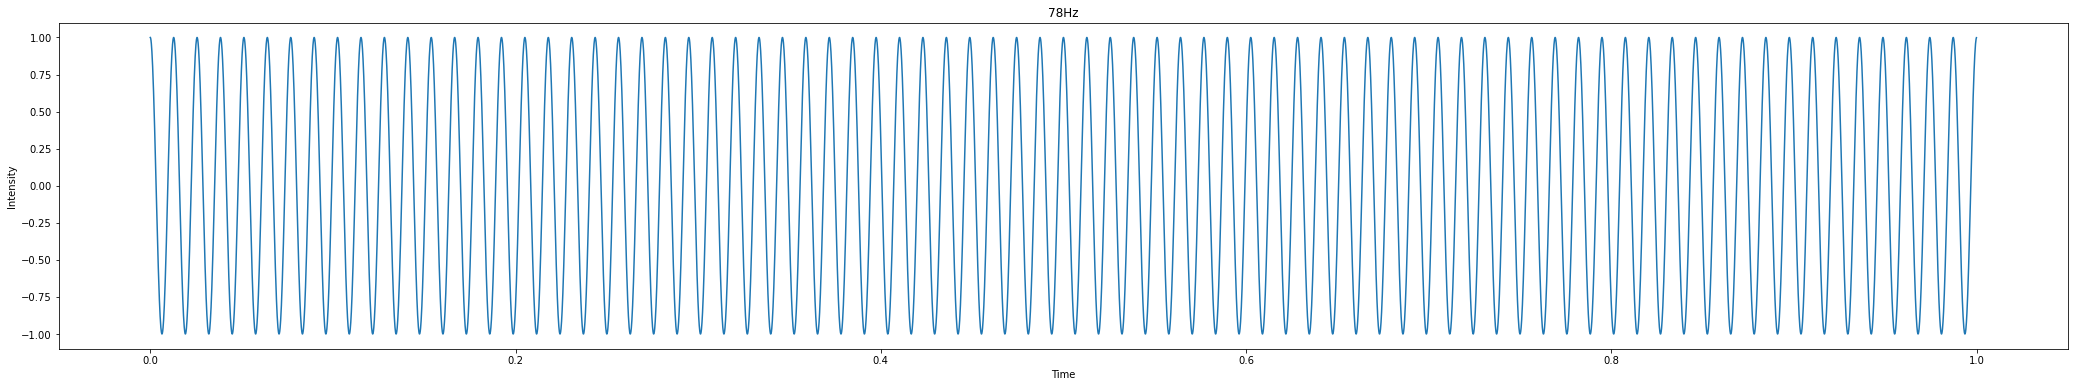

There is a wave at 78Hz


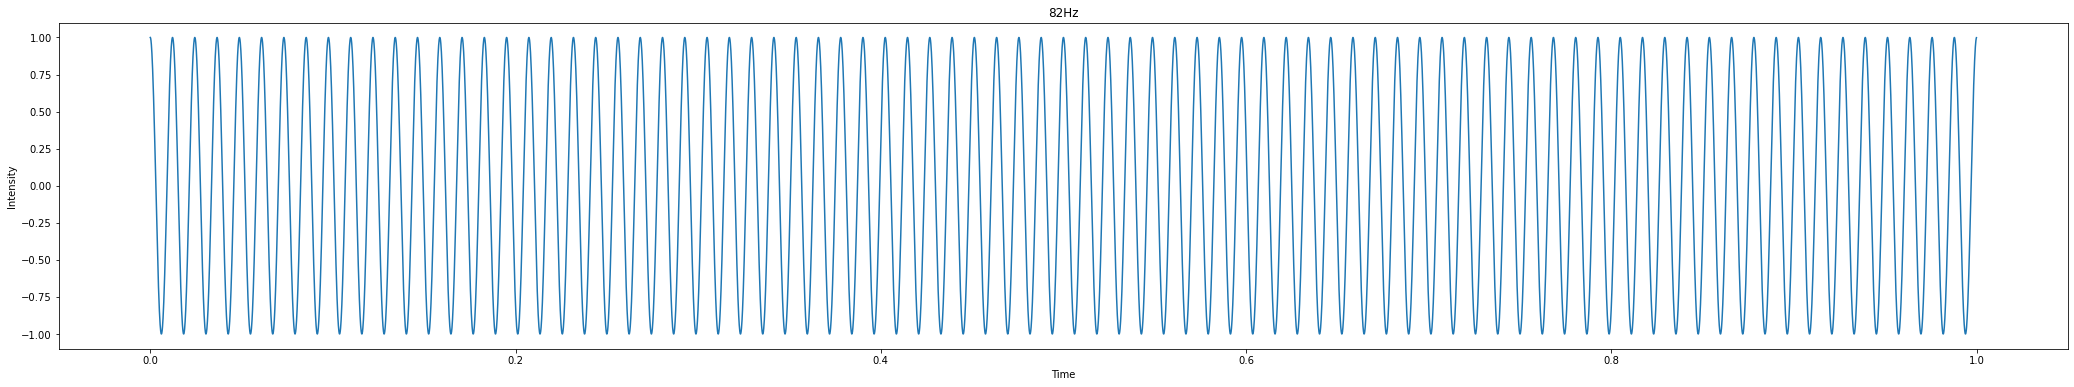

There is a wave at 82Hz


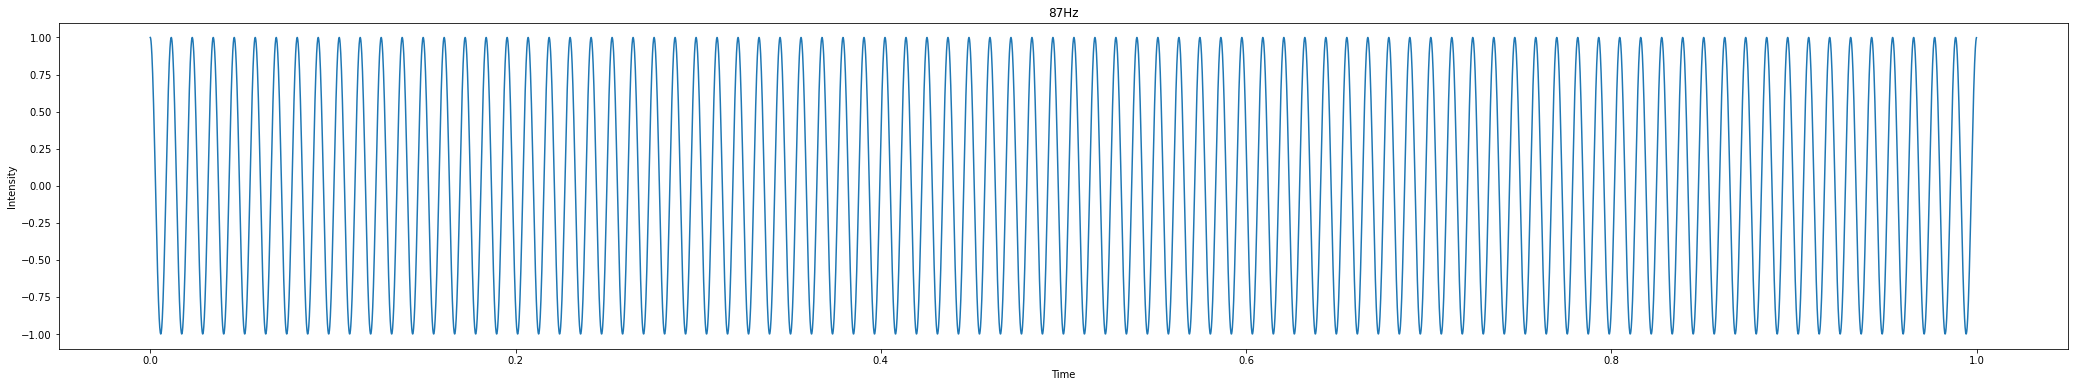

There is a wave at 87Hz


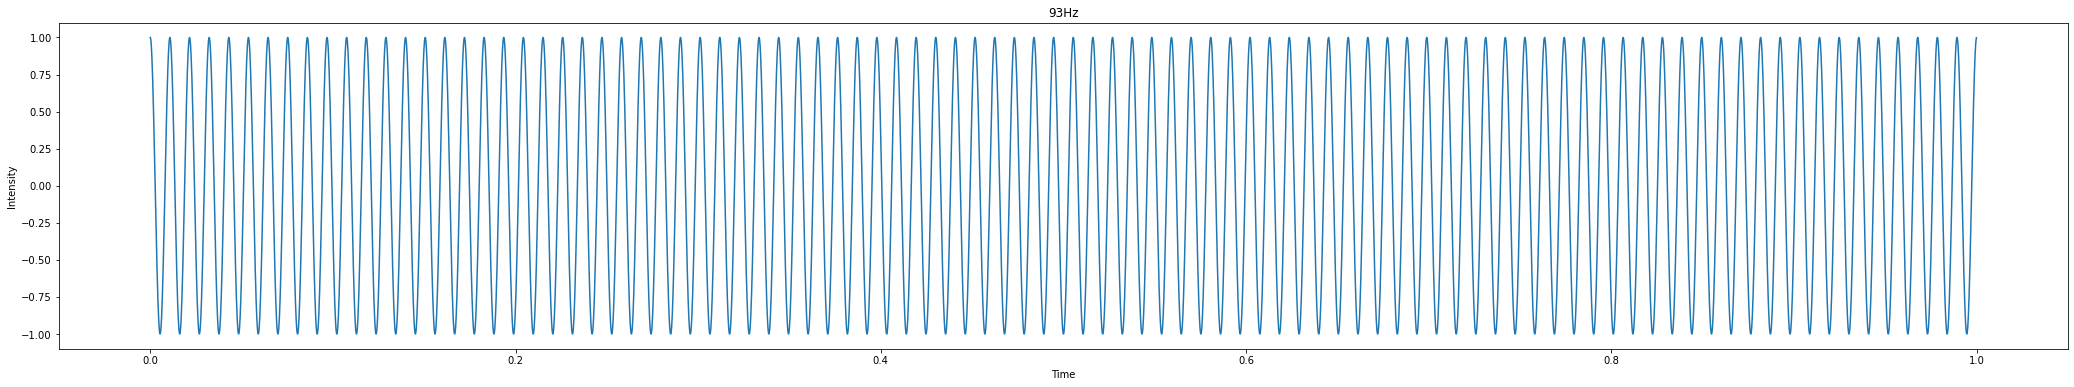

There is a wave at 93Hz


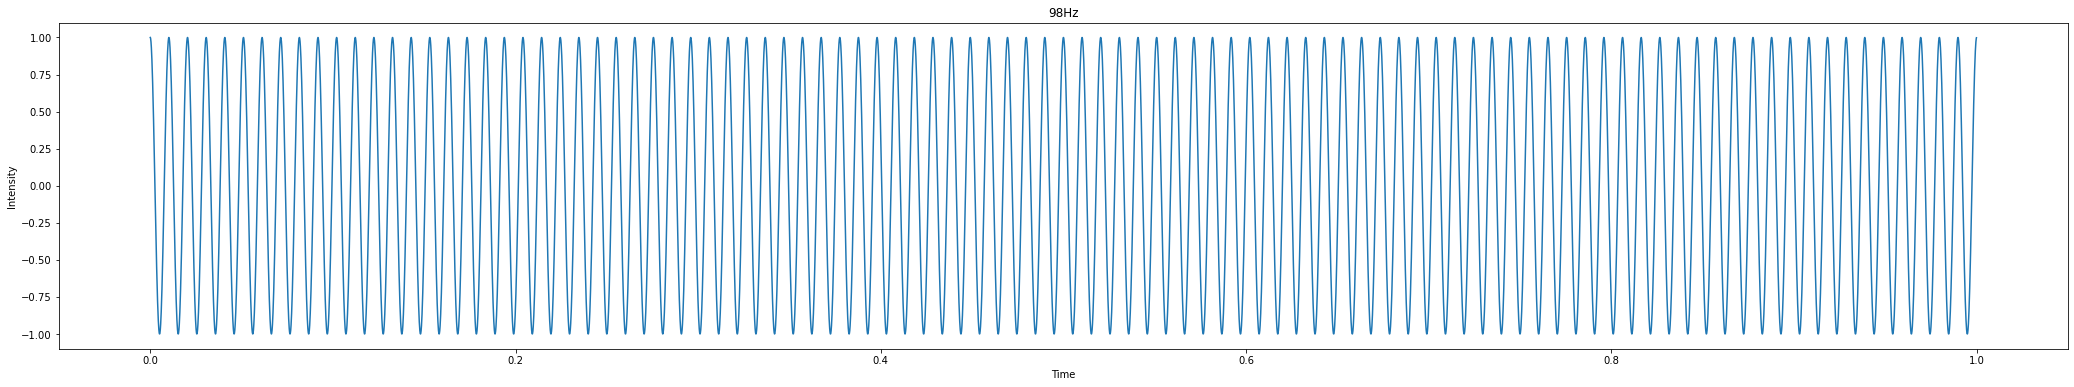

There is a wave at 98Hz


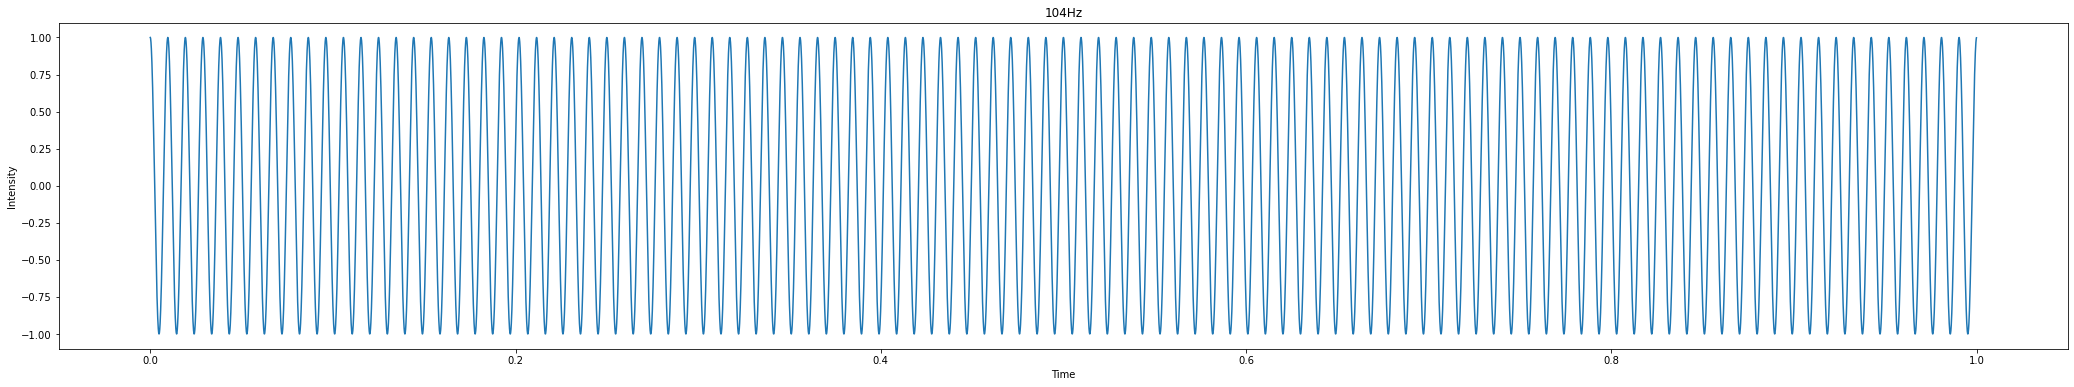

There is a wave at 104Hz


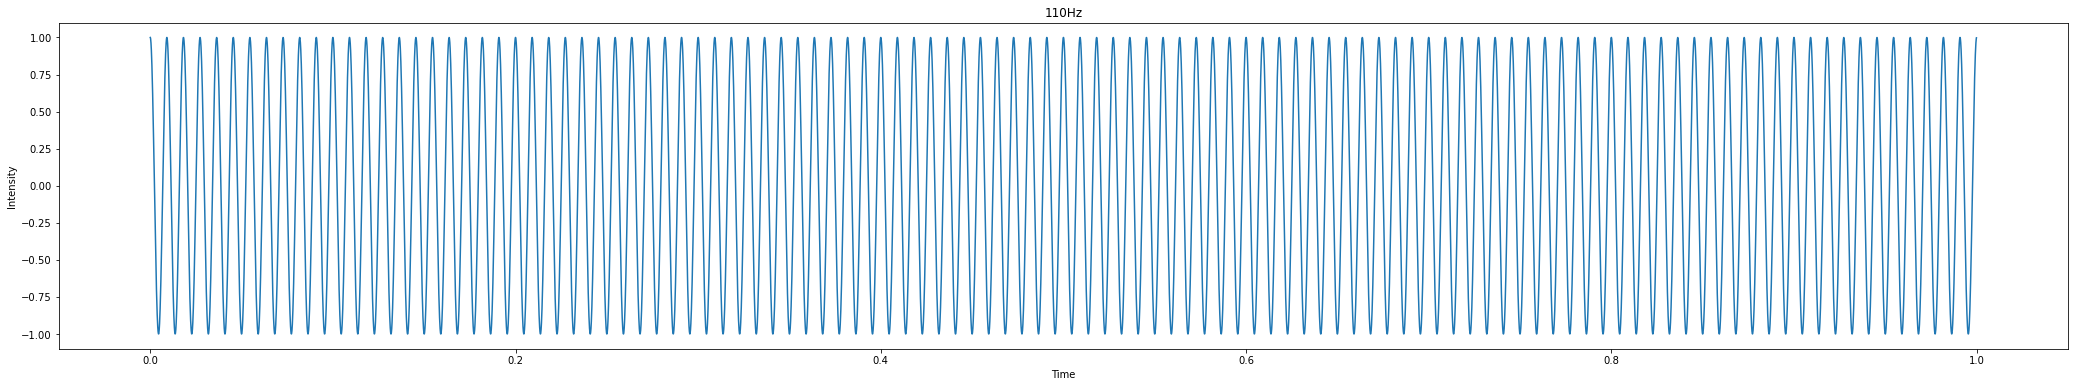

There is a wave at 110Hz


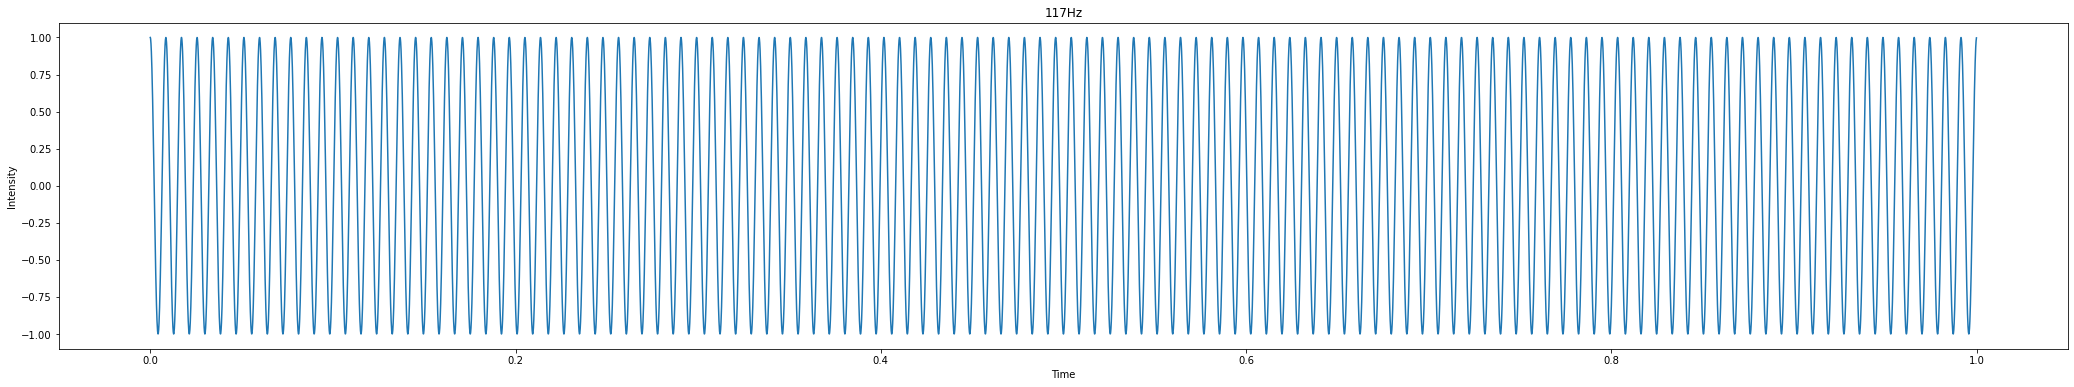

There is a wave at 117Hz


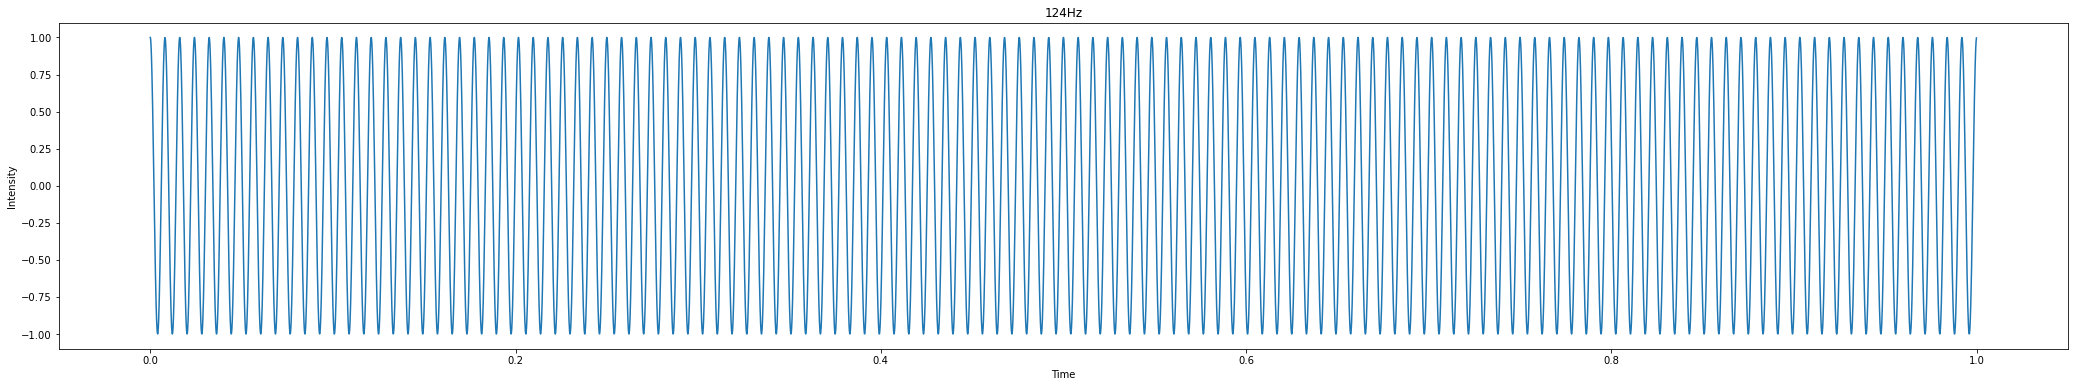

There is a wave at 124Hz


In [127]:
N = 10000 # Sample Rate
TOTAL_TIME = 1 # Signal Time
T = TOTAL_TIME/N # steps

def create_wave(freq, samples=N, length=TOTAL_TIME):
    time_input = np.arange(0, length, length/samples)
    wave = pow(np.e, 2 * np.pi * freq * 1j * time_input)
    return (time_input, wave)

def get_frequencies(freq_y):
    counter = 0
    freq = []
    for value in freq_y:
        if value >= 0.65:
            freq.append(counter//TOTAL_TIME)
        counter = counter + 1
    
    for frequency in freq:
        freq_wave = create_wave(frequency)
        plt.figure(figsize=(36,6))
        plt.title(f"{frequency}Hz")
        plt.ylabel("Intensity")
        plt.xlabel("Time")
        plt.plot(freq_wave[0], freq_wave[1])
        plt.show()
        print(f"There is a wave at {frequency}Hz")

def generate_freq_plot(input_wave, x_axis):
    plt.figure(figsize=(36,6))
    plt.title("Final Wave")
    plt.xlabel("Time (s)")
    plt.ylabel("Intensity")
    plt.plot(x_axis, input_wave/max(input_wave))
    plt.show()

    yf = fft(input_wave)
    xf = fftfreq(N, T)
    xf = fftshift(xf)
    yplot = fftshift(yf)

    half = len(xf)//2

    plt.figure(figsize=(36,6))
    plt.title("Fourier Transform Chart")
    plt.xlabel("Frequency (Hz)")
    plt.plot(xf[half:half+250], 1.0/N * np.abs(yplot[half:half+250]))
    plt.show()

    get_frequencies(1.0/N * np.abs(yplot[half:]))

def generate_compound_wave(notes):
    waves = []
    for note in notes:
        waves.append(create_wave(freq_dictionary[note]))

    count = 0
    final_wave = waves[0][1]
    for wave in waves:
        if count != 0:
            final_wave += wave[1]
        count += 1
    return (final_wave, waves[0][0])

# A Minor Chord
gen_wave = generate_compound_wave(['A', 'C', 'E'])
generate_freq_plot(gen_wave[0], gen_wave[1])

# C Major Chord
gen_wave = generate_compound_wave(['C', 'E', 'G'])
generate_freq_plot(gen_wave[0], gen_wave[1])

# D Major Chord
gen_wave = generate_compound_wave(['D', 'F_Sharp', 'A'])
generate_freq_plot(gen_wave[0], gen_wave[1])

# G Major Chord
gen_wave = generate_compound_wave(['G', 'B', 'D'])
generate_freq_plot(gen_wave[0], gen_wave[1])

# All notes
gen_wave = generate_compound_wave(["C", "C_Sharp", "D", "D_Sharp", "E", "F", "F_Sharp", "G", "G_Sharp", "A", "A_Sharp", "B"])
generate_freq_plot(gen_wave[0], gen_wave[1])
